<a href="https://colab.research.google.com/github/fmedrano2019/StanfordDatathon/blob/main/Public_v_Private.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

Daily.csv analysis: 


In [ ]:
path= '/content/drive/Shareddrives/Stanford Datathon/Datasets/Backup_idea/daily.csv'
df= pd.read_csv(path)
# finding the count of null values:
print(df.isna().sum())
# dropping all the na rows since it's approximately 13% of the data
df.dropna(axis=0, inplace= True)
# just for confirmation that we don't have any NaN values
print(df.isna().sum()) 
print(df.columns)

Country_Region      0
Date                0
Tests             284
Confirmed           0
dtype: int64
Country_Region    0
Date              0
Tests             0
Confirmed         0
dtype: int64
Index(['Country_Region', 'Date', 'Tests', 'Confirmed'], dtype='object')


['Michigan', 'Rutgers', 'Illinois', 'Purdue', 'Michigan State', 'UW-Madison', 'Indiana', 'Maryland', 'Nebraska', 'Ohio State', 'Penn State', 'Minnesota', 'Northwestern']


Text(0, 0.5, 'Data Points from each university')

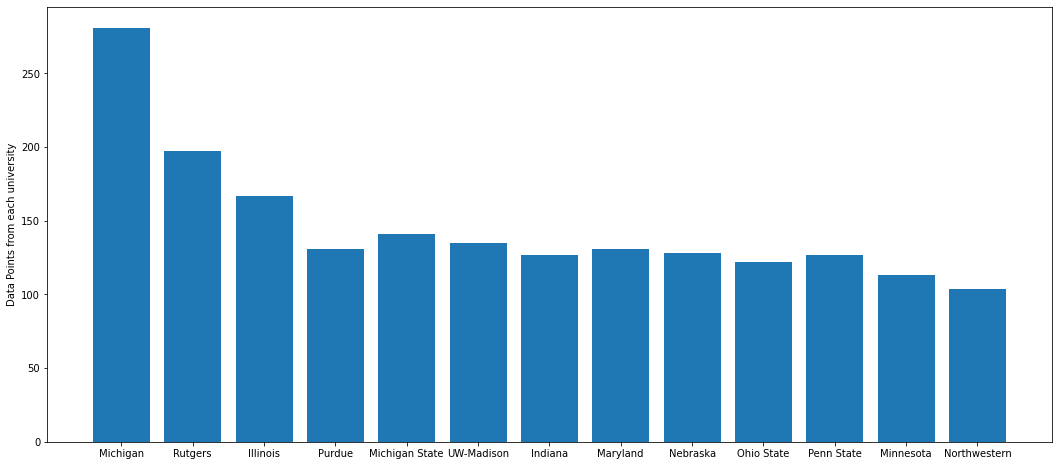

In [ ]:
# finding the proportion of each type of university:
# finiding all unique values and finding count of duplicates and store them in a dictionary: 
count=0
region= list(df['Country_Region'])
regions=[]
for item in region: 
  if item not in regions:
    regions.append(item)  
print(regions)
dist=[]
for i in regions:
  for j in df['Country_Region']:
    if i == j:
      count+=1
  dist.append(count)
  count=0
plt.figure(figsize=(18,8))
plt.bar(regions, dist)
plt.ylabel('Data Points from each university')

[array([0.29099414, 0.24992008, 0.23596878, 0.25077965, 0.24878421]), array([0.82754768, 0.83815026, 0.81386305, 0.86927128, 0.84717646])]


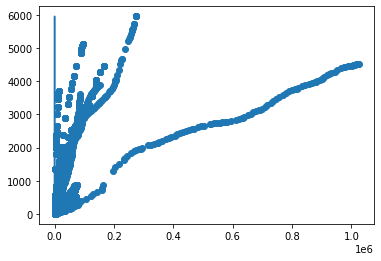

In [ ]:
# running a machine learning model:
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split 
X_train,X_test,y_train, y_test= train_test_split(df['Tests'],df['Confirmed'], train_size= 0.9,test_size=0.1,random_state= 42)
X_train= np.array(X_train).reshape(-1,1)
X_test= np.array(X_test).reshape(-1,1)
models = [LinearRegression(), RandomForestRegressor()] 
scores=[]
for model in models: 
  model.fit(X_train,y_train)
  score= (cross_val_score(model,X_train,y_train, cv=5))
  scores.append(score)
print(scores)

lr= RandomForestRegressor()
lr.fit(X_train,y_train)
predictions= lr.predict(X_test)
plt.scatter(X_train,y_train)
plt.plot(predictions)

Feature Engineering and merging two datasets (daily.csv + Kaggle dataset) 

In [ ]:
paths= ['/content/drive/Shareddrives/Stanford Datathon/Datasets/Backup_idea/College_Data.csv',
        '/content/drive/Shareddrives/Stanford Datathon/Datasets/Backup_idea/daily.csv']
df1= pd.read_csv(paths[0])
print(df1.columns)
df1['University'] = df1['Unnamed: 0']
df1.drop(['Unnamed: 0', 'Apps', 'Accept', 'Enroll', 'Top10perc','Top25perc',
          'Outstate', 'Room.Board',
          'Books', 'Personal', 'PhD', 'Terminal','perc.alumni', 'Grad.Rate'],
         axis=1,inplace=True)
print(df1.columns)
column_order= ['University','Private','F.Undergrad', 'P.Undergrad', 'S.F.Ratio','Expend']
df1= df1[column_order]
df1['Total_students']= df1['F.Undergrad'] + df1['P.Undergrad']
df1['Total Faculty']= df1['Total_students']//df1['S.F.Ratio']
df1['University_strength']= df1['Total_students'] + df1['Total Faculty']
df1.drop(['F.Undergrad','P.Undergrad','S.F.Ratio','Total_students', 'Total Faculty'],axis=1,inplace=True)

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')
Index(['Private', 'F.Undergrad', 'P.Undergrad', 'S.F.Ratio', 'Expend',
       'University'],
      dtype='object')


In [ ]:
df2= pd.read_csv(paths[1])
region= list(df2['Country_Region'])
regions=[]
for item in region: 
  if item not in regions:
    regions.append(item)
#print(len(regions))
unis_changed= []

for uni in range(len(df2['Country_Region'])):
  if df2['Country_Region'][uni] == regions[0]:
    unis_changed.append('University of Michigan at Ann Arbor')
  elif df2['Country_Region'][uni] == regions[1]:
    unis_changed.append('Northwestern University')
  elif df2['Country_Region'][uni] == regions[2]:
    unis_changed.append('Rutgers at New Brunswick')
  elif df2['Country_Region'][uni] == regions[3]:
    unis_changed.append('University of Illinois - Urbana')
  elif df2['Country_Region'][uni] == regions[4]:
    unis_changed.append('Purdue University at West Lafayette')
  elif df2['Country_Region'][uni] == regions[5]:
    unis_changed.append('Michigan State University')
  elif df2['Country_Region'][uni] == regions[6]:
    unis_changed.append('University of Wisconsin at Madison')
  elif df2['Country_Region'][uni] == regions[7]:
    unis_changed.append('Indiana University at Bloomington')
  elif df2['Country_Region'][uni] == regions[8]:
    unis_changed.append('University of Maryland at College Park')
  elif df2['Country_Region'][uni] == regions[9]:
    unis_changed.append('University of Nebraska at Lincoln') 
  elif df2['Country_Region'][uni] == regions[10]:
    unis_changed.append('Ohio University') 
  elif df2['Country_Region'][uni] == regions[11]:
    unis_changed.append('Pennsylvania State Univ. Main Campus')
  elif df2['Country_Region'][uni] == regions[12]:
    unis_changed.append('University of Minnesota Twin Cities')
  elif df2['Country_Region'][uni] == regions[13]:
    unis_changed.append('Iowa State University')
 
print(unis_changed)
df2.drop(['Country_Region'],axis=1, inplace=True)
df2['Conference_University']= unis_changed
new_uni=[]
for uni in unis_changed:
  if uni not in new_uni:
    new_uni.append(uni)
print(len(new_uni))
uni_set =list(set(unis_changed))
column_order=['Date','Conference_University','Tests', 'Confirmed']
df2= df2[column_order]

['University of Michigan at Ann Arbor', 'University of Michigan at Ann Arbor', 'University of Michigan at Ann Arbor', 'University of Michigan at Ann Arbor', 'University of Michigan at Ann Arbor', 'Northwestern University', 'University of Michigan at Ann Arbor', 'University of Michigan at Ann Arbor', 'Northwestern University', 'Northwestern University', 'University of Michigan at Ann Arbor', 'Northwestern University', 'University of Michigan at Ann Arbor', 'Northwestern University', 'University of Michigan at Ann Arbor', 'University of Michigan at Ann Arbor', 'Northwestern University', 'Northwestern University', 'University of Michigan at Ann Arbor', 'University of Michigan at Ann Arbor', 'Northwestern University', 'Northwestern University', 'University of Michigan at Ann Arbor', 'Northwestern University', 'University of Michigan at Ann Arbor', 'Northwestern University', 'University of Michigan at Ann Arbor', 'University of Michigan at Ann Arbor', 'Northwestern University', 'Northwester

In [ ]:
print(len(unis_changed)) # 2189 rows in original csv file, including headers 

2188


In [ ]:
strengths_=[]
private_=[]
expends_=[]
for i in range(len(df2['Conference_University'])):
  for j in range(len(df1['University'])):
    if df2['Conference_University'][i] == df1['University'][j]:
      strengths_.append(df1['University_strength'][j])
      expends_.append(df1['Expend'])
      if df1['Private'][j] == 'Yes':
        private_.append(1)
      elif df1['Private'][j] == 'No':
        private_.append(0)
      break     
    
#print(len(strengths_))
#print(len(private_))
#print(len(df2['Conference_University']))

df2['On_Campus']= strengths_
df2['Private']= private_
df2['Expend']= expends_
print(df2.columns)

Index(['Date', 'Conference_University', 'Tests', 'Confirmed', 'On_Campus',
       'Private', 'Expend'],
      dtype='object')


In [ ]:
# looking at risk of infection based on density clustering
# what to cluster the students with? 
df3= df2.copy()

In [ ]:
# Data Cleaning: 
# there were a good amount of null values in the "Tests" column 
# we can choose whether to drop them all or we could replace the null points
print(df3.isnull().sum())
df3.fillna(0,inplace=True)
print(df3.isnull().sum())

Date                       0
Conference_University      0
Tests                    284
Confirmed                  0
On_Campus                  0
Private                    0
Expend                     0
dtype: int64
Date                     0
Conference_University    0
Tests                    0
Confirmed                0
On_Campus                0
Private                  0
Expend                   0
dtype: int64


In [ ]:
# separating tests based on University: this would help calculate the average tests per university 
tests={}
test=[]
for uni in range(len(new_uni)):
  for index in range(len(df3['Conference_University'])):
    if df3['Conference_University'][index] == new_uni[uni]:
      test.append(df3['Tests'][index])
  tests[new_uni[uni]]= test
  test=[]
print(tests)

{'University of Michigan at Ann Arbor': [41.0, 409.0, 409.0, 409.0, 409.0, 409.0, 409.0, 409.0, 662.0, 662.0, 662.0, 662.0, 662.0, 662.0, 662.0, 815.0, 815.0, 815.0, 815.0, 815.0, 815.0, 815.0, 934.0, 934.0, 934.0, 934.0, 934.0, 934.0, 934.0, 1056.0, 1056.0, 1056.0, 1056.0, 1056.0, 1056.0, 1056.0, 1214.0, 1214.0, 1214.0, 1214.0, 1214.0, 1214.0, 1214.0, 1367.0, 1367.0, 1367.0, 1367.0, 1367.0, 1367.0, 1367.0, 1558.0, 1558.0, 1558.0, 1558.0, 1558.0, 1558.0, 1558.0, 1742.0, 1742.0, 1742.0, 1742.0, 1742.0, 1742.0, 1742.0, 1925.0, 1925.0, 1925.0, 1925.0, 1925.0, 1925.0, 1925.0, 2117.0, 2117.0, 2117.0, 2117.0, 2117.0, 2117.0, 2117.0, 2429.0, 2429.0, 2429.0, 2429.0, 2429.0, 2429.0, 2429.0, 2809.0, 2809.0, 2809.0, 2809.0, 2809.0, 2809.0, 2809.0, 3307.0, 3307.0, 3307.0, 3307.0, 3307.0, 3307.0, 3307.0, 3715.0, 3715.0, 3715.0, 3715.0, 3715.0, 3715.0, 3715.0, 4221.0, 4221.0, 4221.0, 4221.0, 4221.0, 4221.0, 4221.0, 4921.0, 4921.0, 4921.0, 4921.0, 4921.0, 4921.0, 4921.0, 5627.0, 5627.0, 5627.0, 5627.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

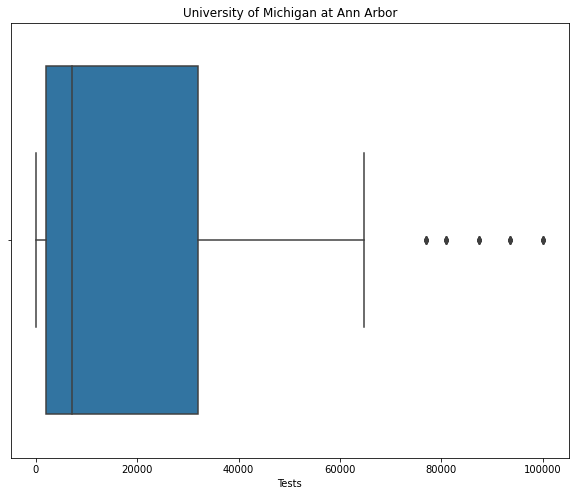

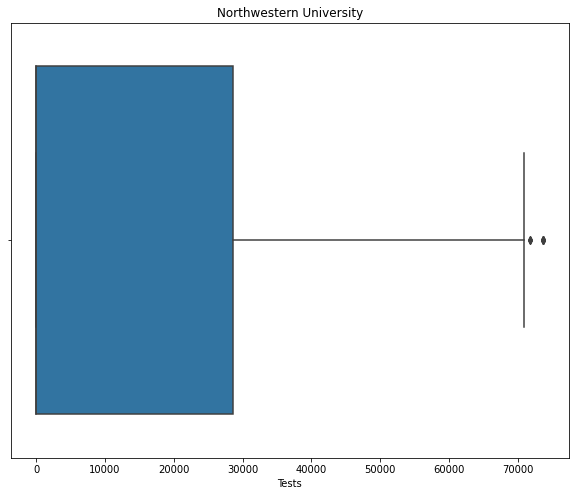

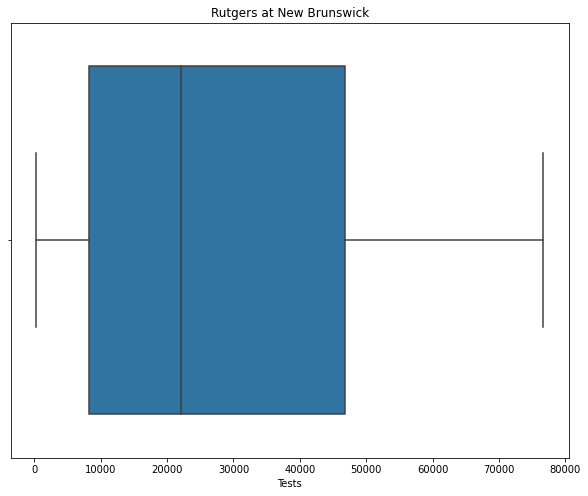

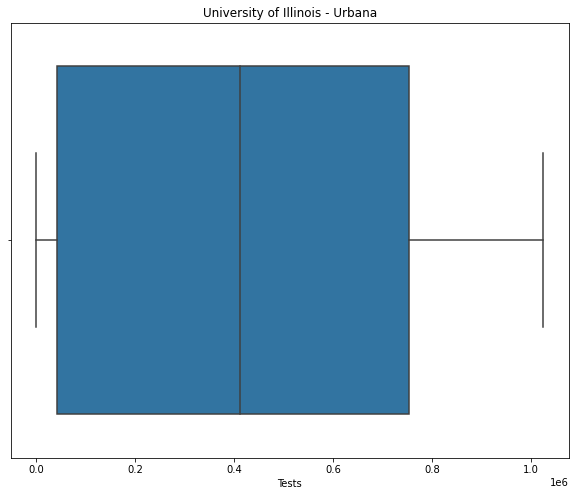

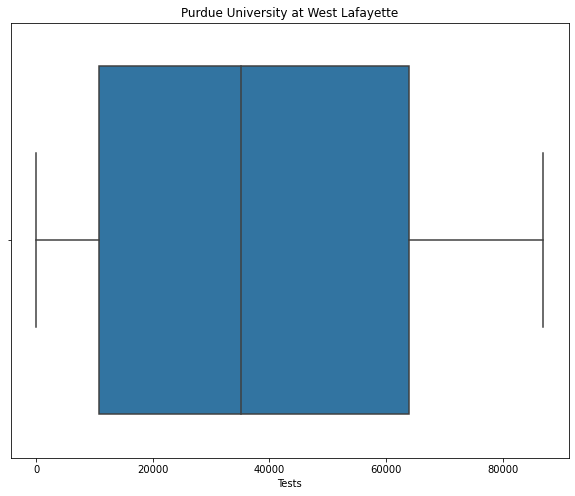

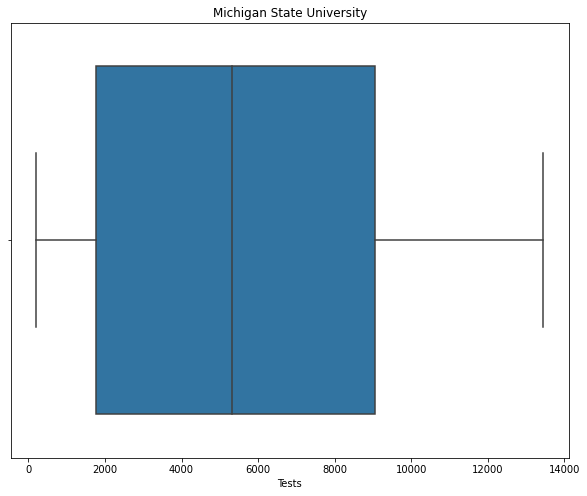

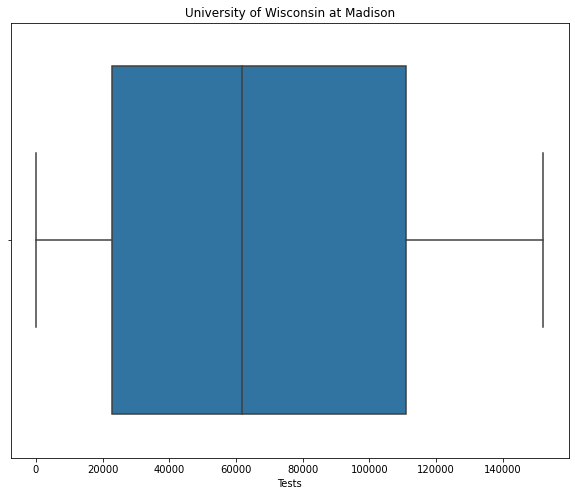

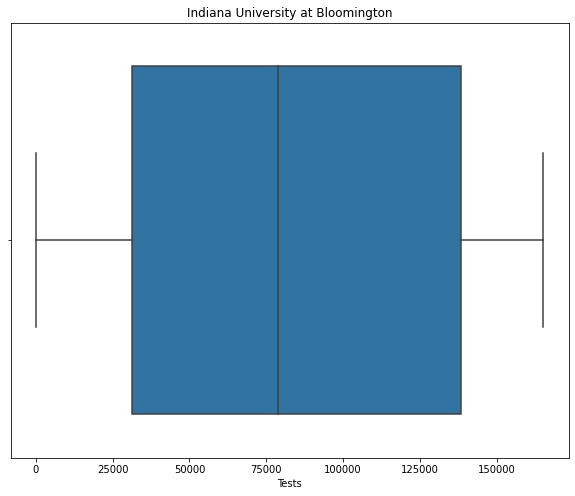

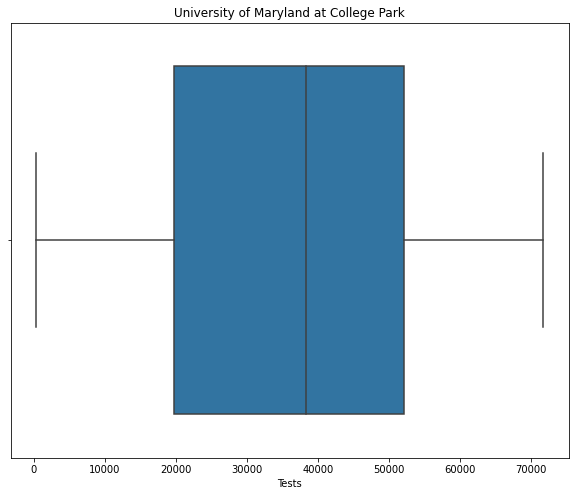

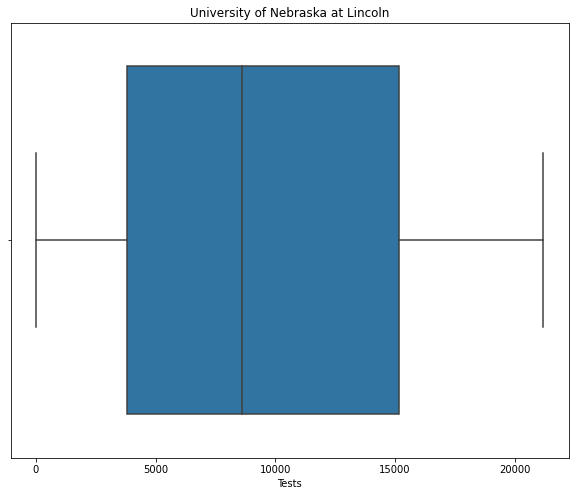

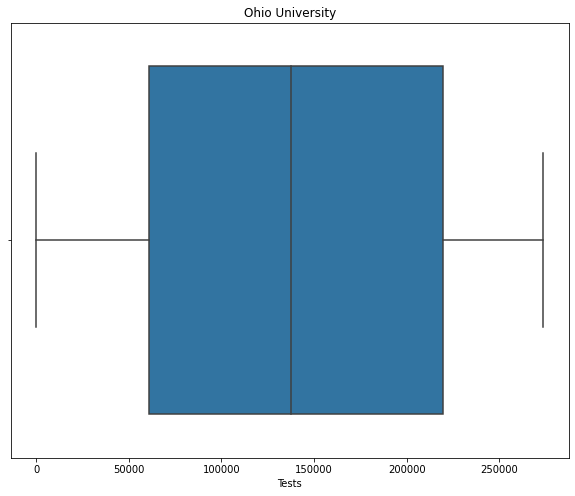

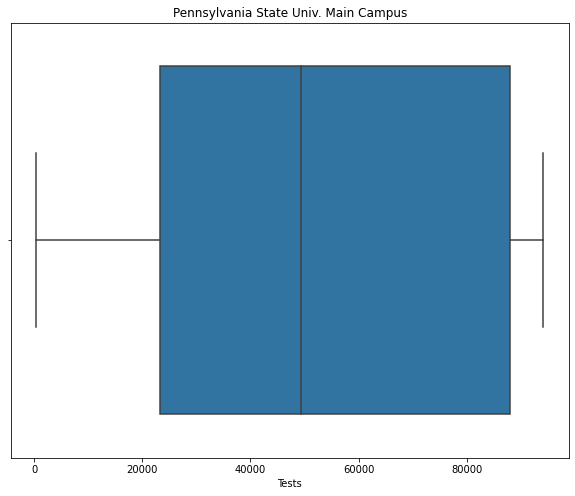

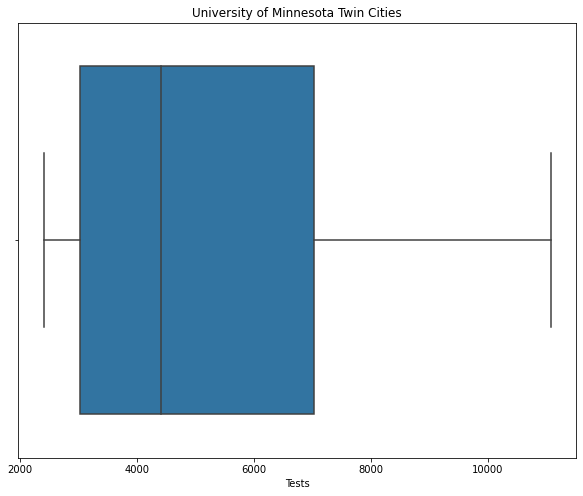

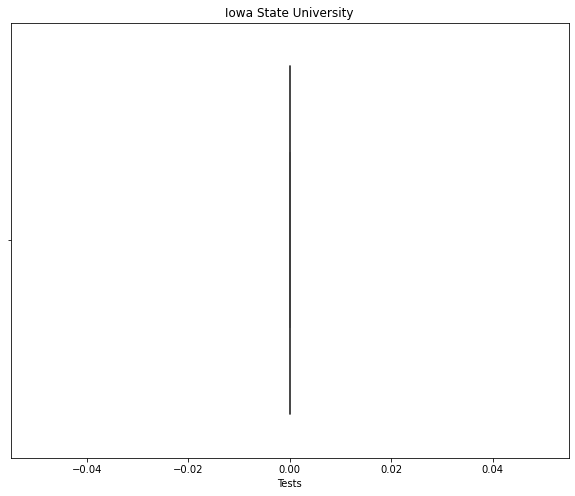

In [ ]:
# plotting a boxplot for each of the unis to see variance and scale of 
for uni in range(len(new_uni)):
  plt.figure(figsize=(10,8))
  plt.title(new_uni[uni])
  plt.xlabel('Tests')
  sns.boxplot(tests[new_uni[uni]])

In [ ]:
mean_tests=[]
for uni in range(len(new_uni)):
  mean= np.array(tests[new_uni[uni]]).mean()
  mean_tests.append(mean)
print(len(mean_tests))

14


In [ ]:
# cleaning the data by adding the mean number of tests of ach university
for uni in range(len(new_uni)):
  for sample in range(len(df3['Conference_University'])):
    if df3['Tests'][sample] == 0 and df3['Conference_University'][sample] == new_uni[uni]:
      df3['Tests'][sample]= mean_tests[uni]
print(df3['Tests'].head(10))

# after the fitting the means of each university, we can scale the data: 
df4= df3.drop('Date',axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0       41.000000
1      409.000000
2      409.000000
3      409.000000
4      409.000000
5    15926.161172
6      409.000000
7      409.000000
8    15926.161172
9    15926.161172
Name: Tests, dtype: float64


In [ ]:
# code block for scaling the data
import sklearn 
from sklearn.preprocessing import MinMaxScaler
min_max= MinMaxScaler()

[26400.0, 8597.0]
{0: 26400.0, 1: 8597.0}


([<matplotlib.axis.XTick at 0x7f048e99b910>,
 [Text(0, 0, 'Public Universities'), Text(0, 0, 'Private Universities')])

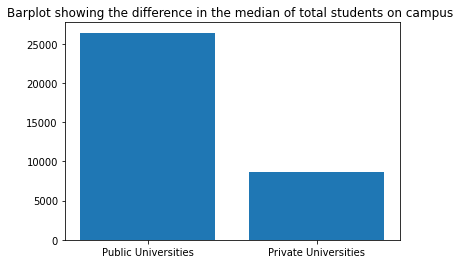

In [ ]:
# spearating public and private crowds in two different lists 
public_total=[]
private_total=[]
median_both=[]
for uni in range(len(df3['Conference_University'])):
  if df3.Private[uni]== 0:
    public_total.append(df3.On_Campus[uni])
  else: 
    private_total.append(df3.On_Campus[uni])

# calculating the median of the total people on public vs private campus 
# this is because we have an imbalance in number of public and number of private schools 
import statistics 
from statistics import median
median_both.append(median(public_total))
median_both.append(median(private_total))
print(median_both)
median_dict={}
for i in range(2):
  median_dict[i]= float(median_both[i])
print(median_dict)
# as we can see the median people on campus in public schools in way higher than private schools
# this can be visualised as such: 
plt.title('Barplot showing the difference in the median of total students on campus ')
plt.bar(range(len(median_dict)), list(median_dict.values()), align='center')
plt.xticks(range(len(median_dict)), ['Public Universities', 'Private Universities'])